In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("titanic.csv")


In [5]:
# First 5 rows
df.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Shape of the dataset
df.shape



(891, 15)

In [9]:
# Info about columns and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [11]:
# Basic statistics
df.describe()



,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Count unique values in categorical columns
df['sex'].value_counts()
df['class'].value_counts()


class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [15]:
df.isnull().sum()
#Missing Values Check

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:

# For categorical columns, fill with "NA"
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df[cat_cols] = df[cat_cols].fillna("NA")

# For numeric columns, fill with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [ ]:
#--------------------------------------Univariate Analysis (One variable at a time)-----------

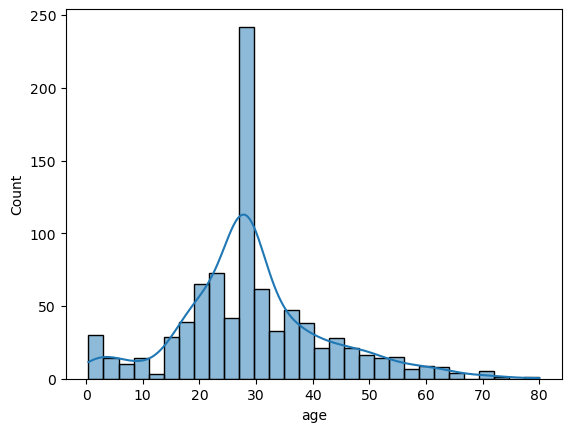

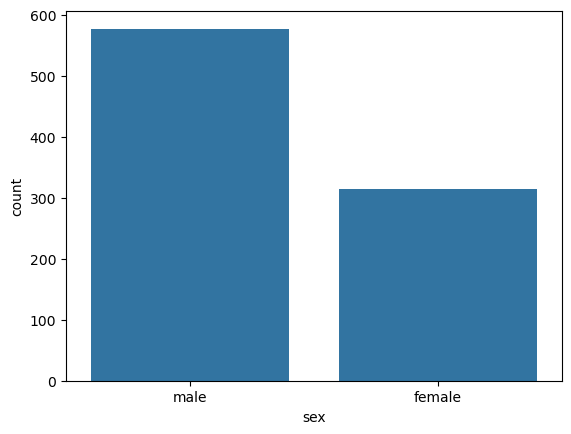

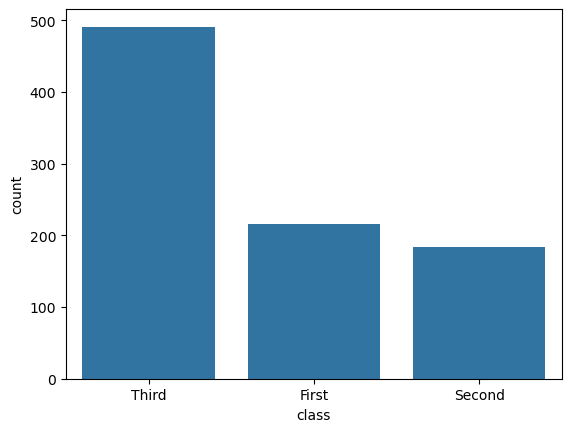

In [21]:
# Histogram of age
sns.histplot(df['age'], kde=True)
plt.show()

# Countplot for gender
sns.countplot(x='sex', data=df)
plt.show()

# Countplot for passenger class
sns.countplot(x='class', data=df)
plt.show()


In [ ]:
#-------------------Bivariate Analysis (Two variables together)-------------

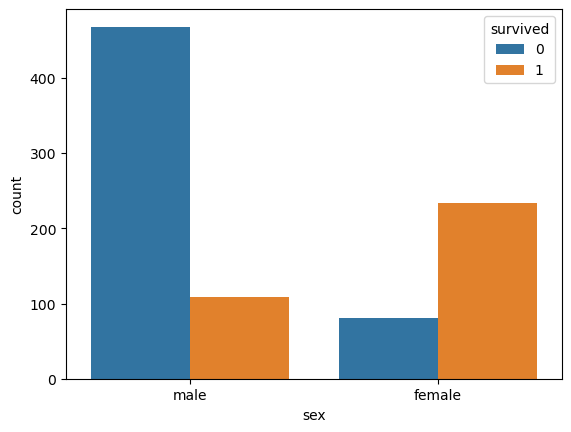

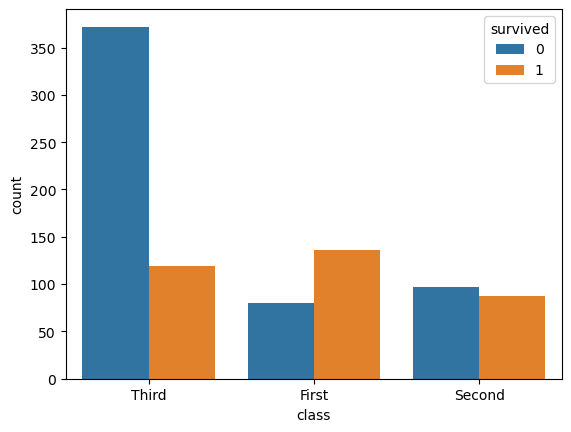

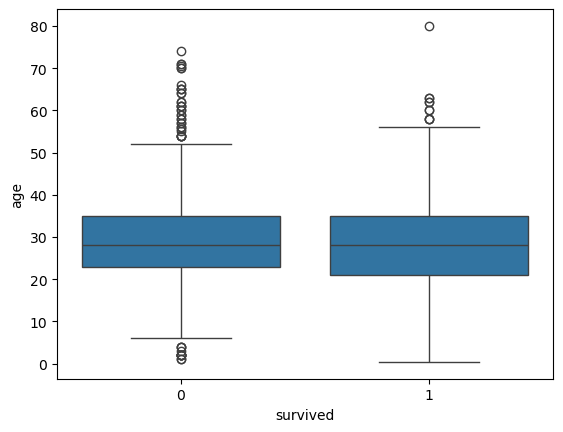

In [23]:
# Survival rate by gender
sns.countplot(x='sex', hue='survived', data=df)
plt.show()           #hue worked as legend

# Survival rate by class
sns.countplot(x='class', hue='survived', data=df)
plt.show()

# Boxplot for age by survival
sns.boxplot(x='survived', y='age', data=df)
plt.show()


In [ ]:
#------------------------- Pairplot & Heatmap-----------

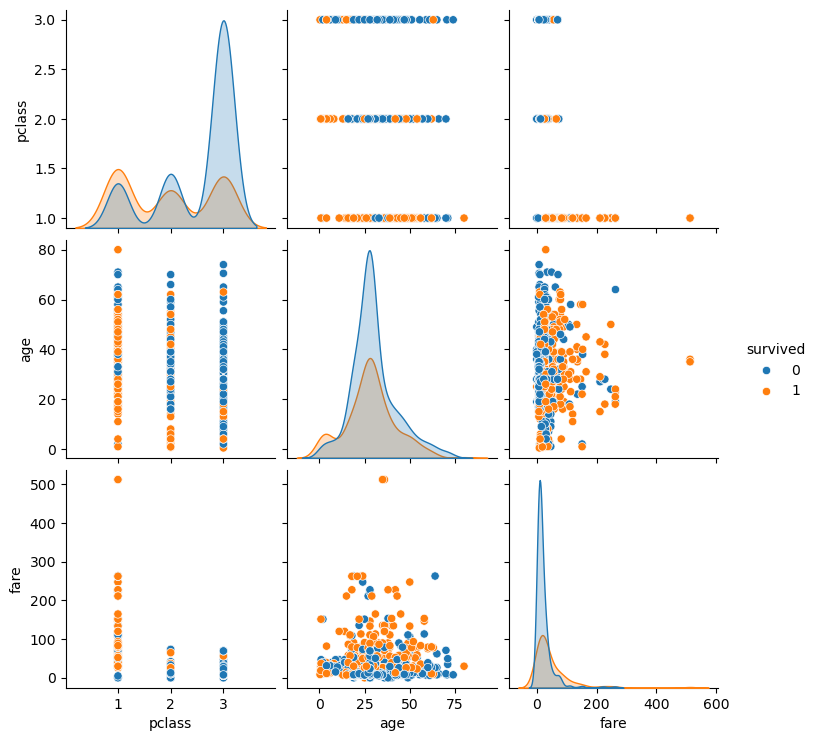

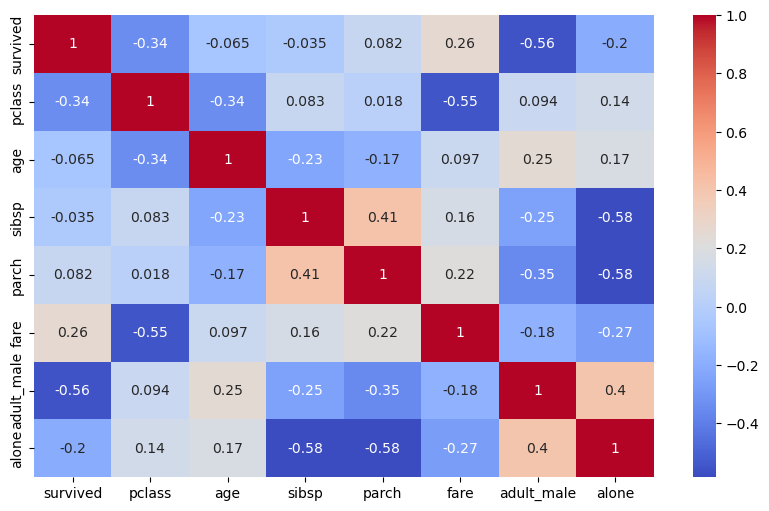

In [25]:
# Pairplot (sample of columns to avoid too many plots)
sns.pairplot(df[['survived', 'pclass', 'age', 'fare']], hue='survived')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


In [27]:
#Observations
# For each visual, write down key points, e.g.:

# “Females had higher survival rates than males.”

# “Passengers in 1st class had higher survival rates.”

# “Younger passengers tended to survive more often.”


In [ ]:
# Summary of Findings
# At the end of the Notebook, include:

# Dataset overview

# Key trends & relationships found

# Any anomalies noticed (e.g., missing ages, extreme fares)